In [10]:
## Reading data

import numpy as np
import pandas as pd

IAValues = pd.read_csv('IAValues.txt')
muaggatt = pd.read_csv('muaggatt.txt')

In [4]:
IAValues.head()

,Unnamed: 0,Unnamed: 0.1,mukey,OBJECTID_1,tk0_5a,tk5_20a,tk20_50a,tk50_100a,tk100_150a,tk150_999a,...,nccpi2cs,nccpi2sg,nccpi2co,nccpi2all,pctearthmc,rootznemc,rootznaws,droughty,pwsl1pomu,musumcpct
0,0,0,1601875,55642,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,100,0,0.0,1,0,100
1,1,1,1601876,55643,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,100,0,0.0,1,0,100
2,2,2,1601877,55584,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NaN,0,0,100
3,3,3,1601878,55622,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,NaN,0,999,100
4,4,4,1601879,55652,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0.0,0,0,100


In [14]:
## Drop the first two useless columns

IAValues = IAValues.drop(IAValues.columns[[0,1]], axis=1)

In [13]:
IAValues.shape

(10801, 47)

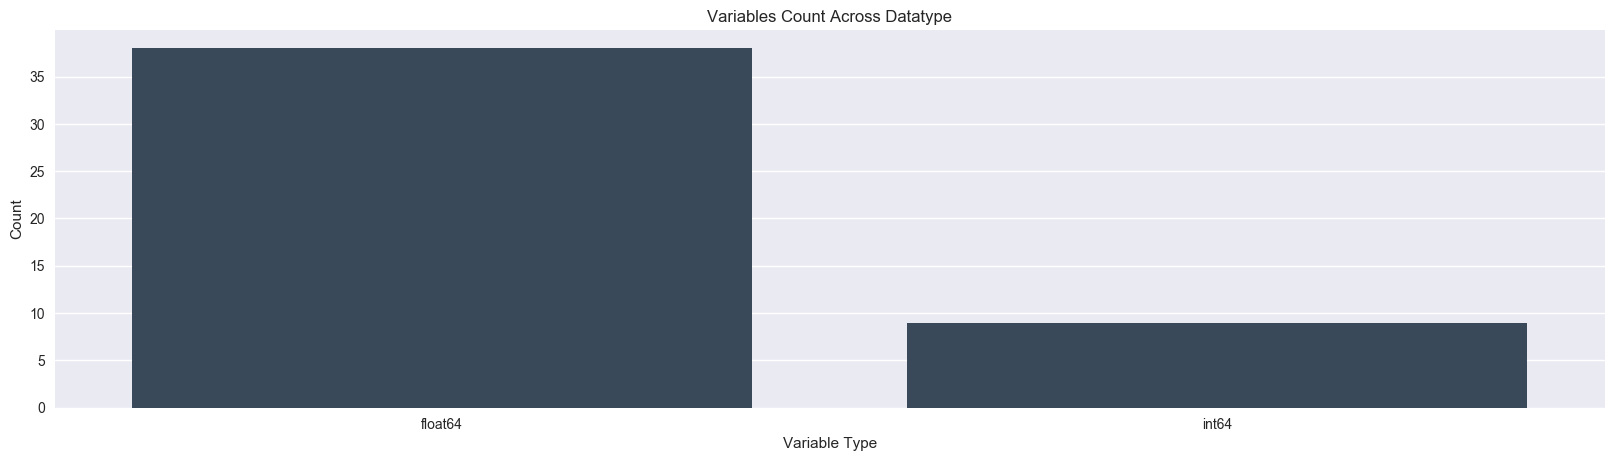

In [5]:
## Checking datatypes
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

dataTypeDf = pd.DataFrame(IAValues.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.barplot(data=dataTypeDf,x="variableType",y="count",ax=ax,color="#34495e")
ax.set(xlabel='Variable Type', ylabel='Count',title="Variables Count Across Datatype")

In [28]:
## Checking missing value and we can see only rootznaws has NA
testing.columns

Index([u'tk0_5a', u'tk5_20a', u'tk20_50a', u'tk50_100a', u'tk100_150a',
       u'tk150_999a', u'tk0_20a', u'tk0_30a', u'tk0_100a', u'tk0_150a',
       u'tk0_999a', u'musumcpcta', u'soc0_5', u'soc5_20', u'soc20_50',
       u'soc50_100', u'soc100_150', u'soc150_999', u'soc0_20', u'soc0_30',
       u'soc0_100', u'soc0_150', u'soc0_999', u'tk0_5s', u'tk5_20s',
       u'tk20_50s', u'tk50_100s', u'tk100_150s', u'tk150_999s', u'tk0_20s',
       u'tk0_30s', u'tk0_100s', u'tk0_150s', u'tk0_999s', u'musumcpcts',
       u'nccpi2cs', u'nccpi2sg', u'nccpi2co', u'nccpi2all', u'pctearthmc',
       u'rootznemc', u'droughty', u'pwsl1pomu', u'musumcpct'],
      dtype='object')

In [17]:
training = IAValues[IAValues.rootznaws.notnull()]

In [23]:
testing = IAValues[IAValues.rootznaws.isnull()]

In [27]:
testing = testing.drop(['mukey', 'OBJECTID_1', 'rootznaws'], axis=1)

In [21]:
## Drop the id columns
training = training.drop(training.columns[[0,1]], axis=1)

In [34]:
def get_xy(df, response):
    y = df[response]
    x = df.iloc[:, df.columns != response]
        
    return x, y

x, y = get_xy(training, 'rootznaws')

In [35]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [36]:
pd.options.display.max_columns = 999
X_train.describe()

,tk0_5a,tk5_20a,tk20_50a,tk50_100a,tk100_150a,tk150_999a,tk0_20a,tk0_30a,tk0_100a,tk0_150a,tk0_999a,musumcpcta,soc0_5,soc5_20,soc20_50,soc50_100,soc100_150,soc150_999,soc0_20,soc0_30,soc0_100,soc0_150,soc0_999,tk0_5s,tk5_20s,tk20_50s,tk50_100s,tk100_150s,tk150_999s,tk0_20s,tk0_30s,tk0_100s,tk0_150s,tk0_999s,musumcpcts,nccpi2cs,nccpi2sg,nccpi2co,nccpi2all,pctearthmc,rootznemc,droughty,pwsl1pomu,musumcpct
count,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000
mean,4.619063,13.857067,27.593746,45.061676,44.250405,17.525625,18.476129,27.706001,91.131551,135.381956,152.907581,92.385511,1188.432592,3449.843321,4398.583687,4148.588992,2481.704240,660.722157,4638.275803,6375.797723,13185.448433,15667.152441,16327.874846,4.615384,13.844091,27.550358,44.978957,44.160774,17.452634,18.459474,27.675810,90.988790,135.149564,152.602198,92.311932,0.637683,0.441339,0.000957,0.638294,86.837784,132.011648,0.155114,32.265767,99.998580
std,1.276211,3.828602,7.740742,13.843328,15.280029,21.244278,5.104812,7.658530,26.121703,40.504543,50.674925,25.525080,708.071212,2158.198620,4419.509786,5288.335122,3646.501951,1939.514861,2862.890327,4347.075128,11908.912869,14830.057365,15829.930808,1.275736,3.826799,7.761048,13.897386,15.337020,21.240273,5.102485,7.655497,26.196202,40.642695,50.825385,25.515581,0.263917,0.195787,0.009183,0.263483,22.205023,42.292766,0.362039,119.855143,0.119183
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000
25%,5.000000,15.000000,30.000000,50.000000,50.000000,2.000000,20.000000,30.000000,100.000000,150.000000,152.000000,100.000000,815.592499,2253.329895,1375.192505,1174.342499,1032.452484,43.237501,3096.349976,3732.720093,6044.890137,7223.332397,7585.060059,5.000000,15.000000,30.000000,50.000000,50.000000,2.000000,20.000000,30.000000,100.000000,150.000000,152.000000,100.000000,0.510000,0.330000,0.000000,0.510000,85.000000,150.000000,0.000000,0.000000,100.000000
50%,5.000000,15.000000,30.000000,50.000000,50.000000,2.500000,20.000000,30.000000,100.000000,150.000000,152.000000,100.000000,1100.800049,3140.859985,2910.969971,2320.000000,1283.775024,119.769997,4238.580078,5569.385010,9513.165039,10977.479981,11359.790039,5.000000,15.000000,30.000000,50.000000,50.000000,2.160000,20.000000,30.000000,100.000000,150.000000,152.000000,100.000000,0.690000,0.480000,0.000000,0.690000,95.000000,150.000000,0.000000,0.000000,100.000000
75%,5.000000,15.000000,30.000000,50.000000,50.000000,45.200001,20.000000,30.000000,100.000000,150.000000,195.199997,100.000000,1430.172516,4234.100098,6160.875122,4646.397705,2220.677551,962.380005,5651.199951,8150.127686,16907.000000,19275.477539,19818.650391,5.000000,15.000000,30.000000,50.000000,50.000000,45.200001,20.000000,30.000000,100.000000,150.000000,195.199997,100.000000,0.840000,0.590000,0.000000,0.840000,100.000000,150.000000,0.000000,5.000000,100.000000
max,5.000000,15.000000,30.000000,50.000000,50.000000,94.150002,20.000000,30.000000,100.000000,150.000000,244.149994,100.000000,7612.500000,22837.500000,45675.000000,54578.000000,53969.000000,51950.601562,30450.000000,45675.000000,116391.898438,165166.203125,198980.593750,5.000000,15.000000,30.000000,50.000000,50.000000,94.150002,20.000

In [99]:
corr_df = pd.concat([X_train, y_train], axis=1).corr().abs()
s = corr_df.unstack()

In [100]:
corrdf = pd.DataFrame(s['rootznaws'].sort_values(ascending = False)[1:11]).reset_index()
corrdf.shape

(10, 2)

In [82]:
X_train[corrdf['index']][['rootznemc', 'nccpi2all', 'tk0_150s', 'tk50_100a', 'tk0_100s', 'tk100_150a']]

,rootznemc,nccpi2all,tk0_150s,tk50_100a,tk0_100s,tk100_150a
5362,0,0.00,0.000000,0.000000,0.000000,0.0
5466,0,0.00,0.000000,0.000000,0.000000,0.0
6154,0,0.00,0.000000,0.000000,0.000000,0.0
7704,119,0.51,150.000000,50.000000,100.000000,50.0
1989,76,0.56,84.000000,34.000000,84.000000,0.0
128,150,0.71,147.000000,49.000000,98.000000,49.0
3159,150,0.76,150.000000,50.000000,100.000000,50.0
6431,150,0.49,90.000000,30.000000,60.000000,30.0
1730,150,0.89,150.000000,50.000000,100.000000,50.0
1233,150,0.73,150.000000,50.000000,100.000000,50.0


In [200]:
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

## Splitting the training data to train and test with ratio 80% vs 20%
## I started with trying all the features and further feature exploration and engineering work should be done
## if I have more time
X = training.ix[:, training.columns != 'rootznaws']
Y = training['rootznaws']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [219]:
from sklearn.model_selection import train_test_split
def split_train_test_validation(df, response, test_size = 0.2):
    X, Y = get_xy(df, response)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [220]:
## split data to train, validation, test

X_train, X_test, y_train, y_test = split_train_test_validation(training, 'rootznaws')

In [279]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('RF', RandomForestRegressor()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=42, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_rs[feat_names[indices]], y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -1678.891447 (94.015658)
KNN: -1236.823017 (124.005003)
RF: -1086.412251 (124.961116)


In [276]:
from sklearn.metrics import mean_squared_error
algo = RandomForestRegressor()
algo.fit(X_train_rs[feat_names[indices]], np.log1p(y_train))
pred = np.exp(algo.predict(X_test_rs[feat_names[indices]]))

print mean_squared_error(y_test, pred)

955.097188209


In [278]:
pred

array([ 281.631,  314.048,    1.   , ...,  273.57 ,  276.247,  299.737])

In [182]:
## Models I have tried: linear regression, lasso, ridge, random forest, gradient boosting

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

## Using cross validation and rmse as metric to compare the performances of each model
avg_cv_rmse = []
for algo in [LinearRegression(), Lasso(alpha=0.5), Ridge(alpha=0.5), RandomForestRegressor(), GradientBoostingRegressor()]:
    algo.fit(fit.transform(X_train), np.log1p(y_train))
    pred = algo.predict(fit.transform(X_test))
    avg_cv_rmse.append(np.sqrt(mean_squared_error(np.log1p(y_test), pred)))
print avg_cv_rmse

[0.37410856742319404, 0.4287194282709913, 0.37439460476407171, 0.087703099040349355, 0.13253620835089464]


In [90]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder, LabelEncoder

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
def get_matrix(x, impute_strategy = 'median', output_format = 'df'):
    numeric_df = x.select_dtypes(include=[np.number])
    category_df = x.select_dtypes(include=[object])
    category_df = category_df.fillna('unknown')
    num_pipeline = Pipeline([
        ('selector', DataFrameSelector(numeric_df.columns)),
        ('imputer', Imputer(strategy=impute_strategy)),
        ('std_scaler', StandardScaler())
    ])
    
    if output_format == 'matrix':
        num_result = num_pipeline.fit_transform(numeric_df)
        category_df = category_df.apply(LabelEncoder().fit_transform)
        ohe = OneHotEncoder()
        ohe_result = ohe.fit_transform(category_df).toarray()
        result = np.hstack([num_result, ohe_result])
    elif output_format == 'df':
        num_result = pd.DataFrame(num_pipeline.fit_transform(numeric_df))
        num_result.columns = numeric_df.columns
        category_result = pd.get_dummies(category_df)
        result = pd.concat([num_result, category_result], axis=1)
    
    return result

In [225]:
ss = StandardScaler()
X_train_ss = pd.DataFrame(ss.fit_transform(X_train))
X_train_ss.columns = X_train.columns

In [110]:
ss.fit(X_train)
X_test_ss = pd.DataFrame(ss.transform(X_test))
X_test_ss.columns = X_test.columns

In [257]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
X_train_rs = pd.DataFrame(rs.fit_transform(X_train))
X_train_rs.columns = X_train.columns

In [258]:
rs.fit(X_train)
X_test_rs = pd.DataFrame(rs.transform(X_test))
X_test_rs.columns = X_test.columns

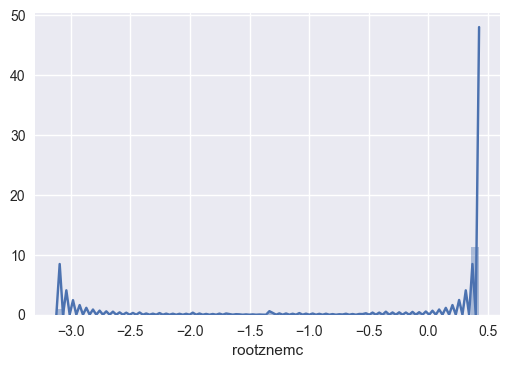

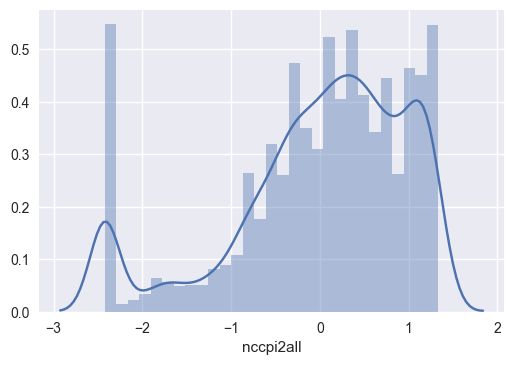

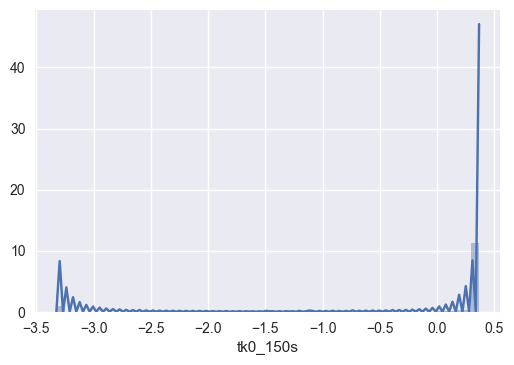

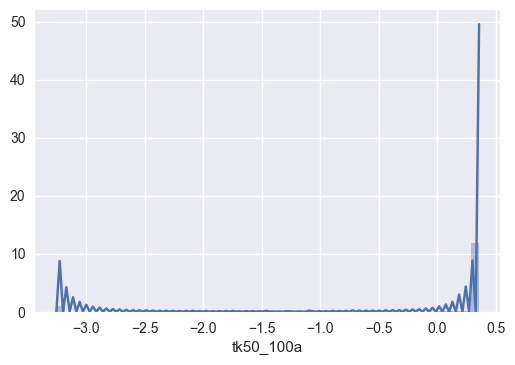

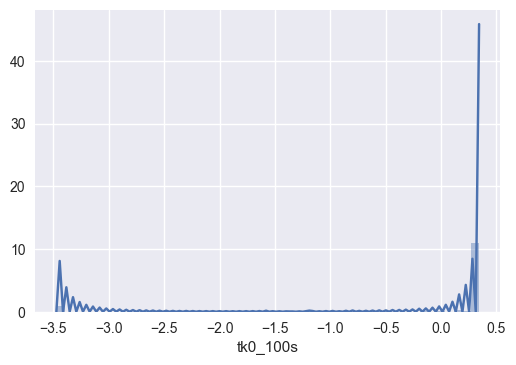

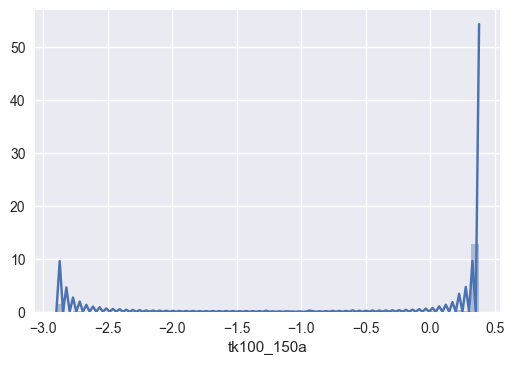

In [129]:
for i, col in enumerate(['rootznemc', 'nccpi2all', 'tk0_150s', 'tk50_100a', 'tk0_100s', 'tk100_150a']):
    plt.figure(i)
    sns.distplot(X_train_ss[col])

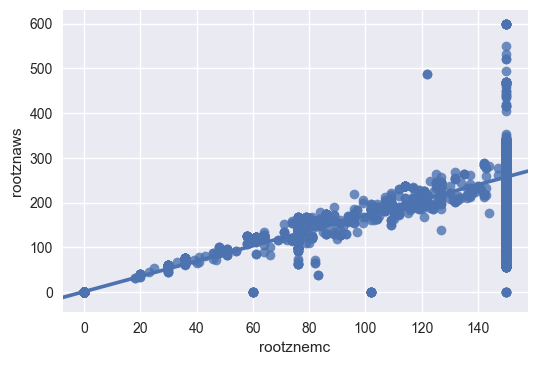

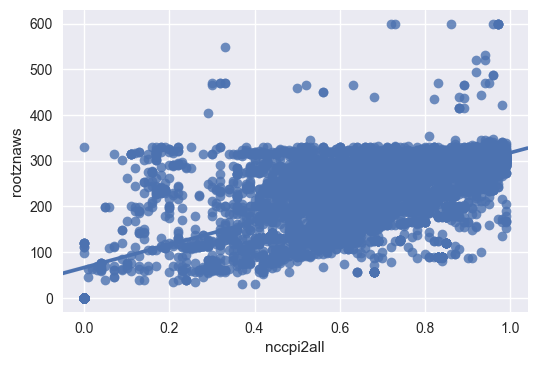

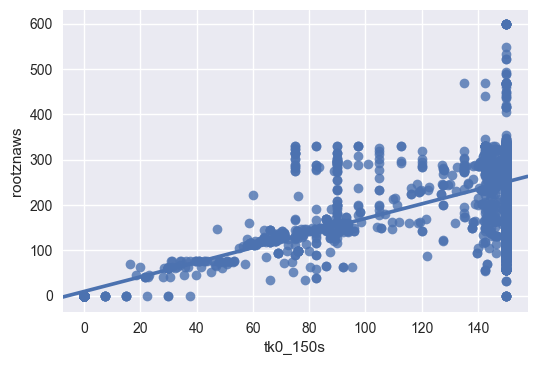

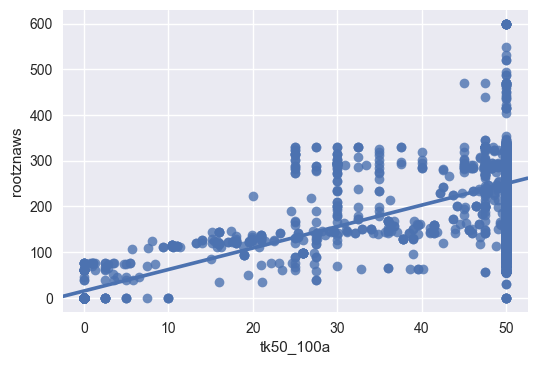

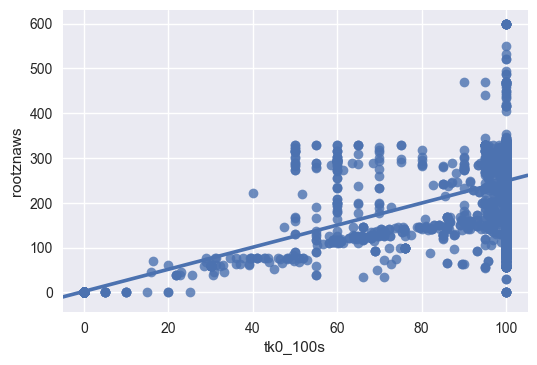

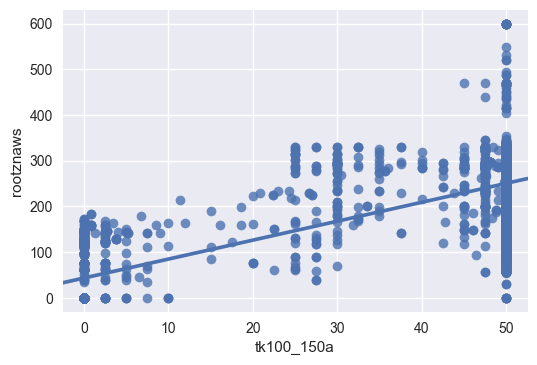

In [131]:
import matplotlib.pyplot as plt
import pandas
from pandas.tools.plotting import scatter_matrix

for i, col in enumerate(['rootznemc', 'nccpi2all', 'tk0_150s', 'tk50_100a', 'tk0_100s', 'tk100_150a']):
    plt.figure(i)
    sns.regplot(X_train[col], y_train)

In [97]:
corr_df_ss = pd.concat([X_train_ss, y_train], axis=1).corr().abs()
ss = corr_df.unstack()
corrdf = pd.DataFrame(ss['rootznaws'].sort_values(ascending = False)[1:11]).reset_index()

In [259]:
import xgboost as xgb

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(X_train_rs, y_train, feature_names=X_train_ss.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)

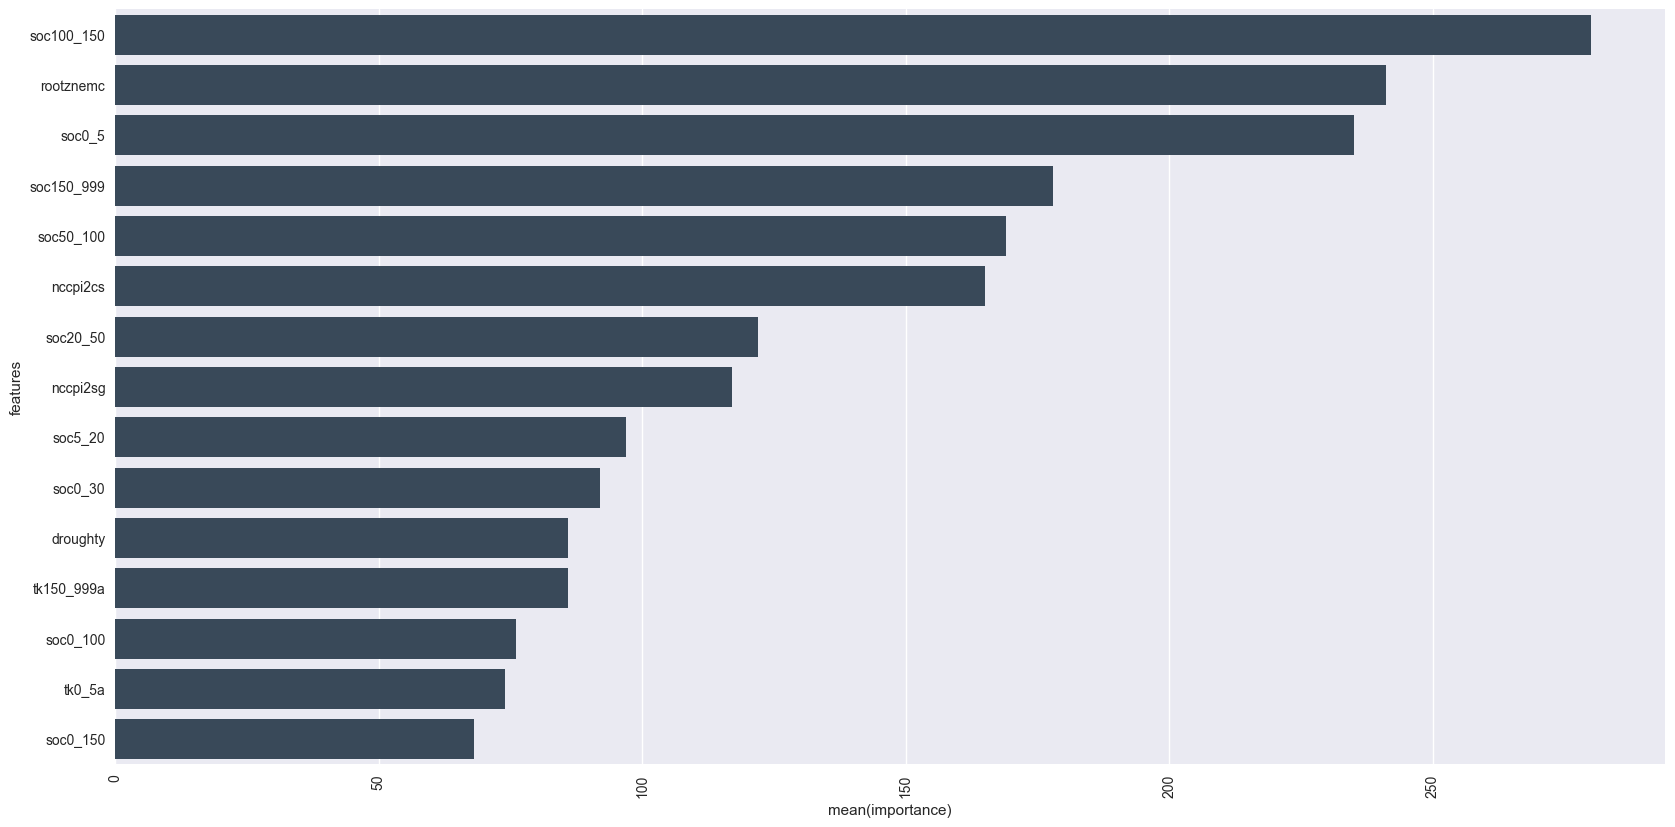

In [260]:
featureImportance = model.get_fscore()
features = pd.DataFrame()
features['features'] = featureImportance.keys()
features['importance'] = featureImportance.values()
features.sort_values(by=['importance'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=90)
sns.barplot(data=features.head(15),x="importance",y="features",ax=ax,orient="h",color="#34495e")

In [249]:
## xgboost top 15 features
X_train[features['features'][0:16]].head()

,soc100_150,rootznemc,soc0_5,soc50_100,soc150_999,nccpi2cs,soc20_50,nccpi2sg,tk150_999a,soc0_30,soc5_20,droughty,tk0_5a,soc0_150,soc0_100,soc0_999
5362,0.00000,0,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,1,0.0,0.000000,0.000000,0.000000
5466,0.00000,0,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000
6154,0.00000,0,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,0,0.0,0.000000,0.000000,0.000000
7704,1310.73999,119,981.340027,1547.000000,309.179993,0.51,993.919983,0.27,14.75,4265.879883,2898.070068,0,5.0,7731.080078,6420.330078,8040.259766
1989,0.00000,76,1334.469971,1911.920044,0.000000,0.56,6576.350098,0.50,0.00,8006.819824,4003.409912,1,5.0,13826.160156,13826.160156,13826.160156


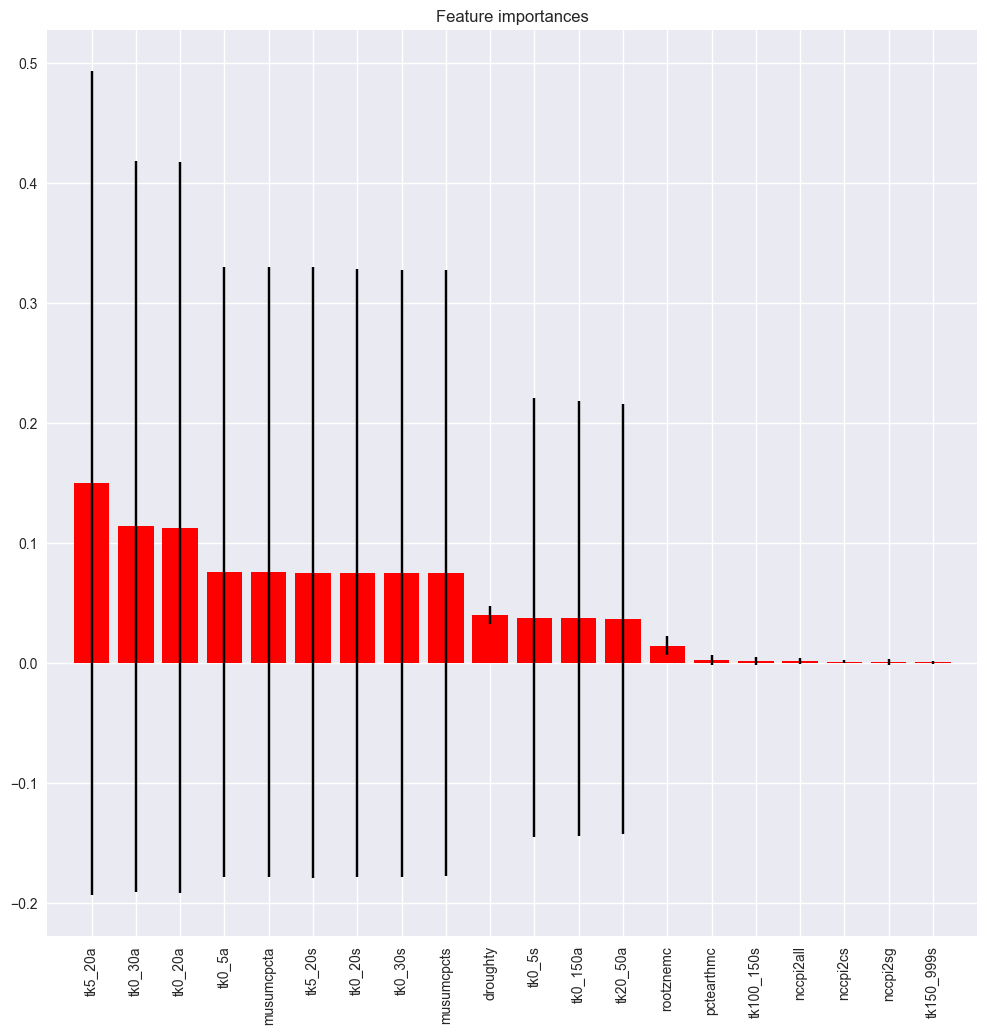

In [262]:
feat_names = X_train_rs.columns.values

from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=5, max_features=0.7, n_jobs=-1, random_state=0)
model.fit(X_train_rs, np.log1p(y_train))

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [256]:
## extra tree top 20 features

X_train_ss[feat_names[indices]].head()

,tk5_20a,tk0_30a,tk0_20a,tk0_5a,musumcpcta,tk5_20s,tk0_20s,tk0_30s,musumcpcts,droughty,tk0_5s,tk0_150a,tk20_50a,rootznemc,pctearthmc,tk100_150s,nccpi2all,nccpi2cs,nccpi2sg,tk150_999s
0,-3.619612,-3.617923,-3.619613,-3.619613,-3.619658,-3.617926,-3.617999,-3.615412,-3.618122,2.333857,-3.618078,-3.342627,-3.564995,-3.121598,0.592801,-2.879563,-2.422696,-2.416401,-2.254341,-0.821735
1,-3.619612,-3.617923,-3.619613,-3.619613,-3.619658,-3.617926,-3.617999,-3.615412,-3.618122,-0.428475,-3.618078,-3.342627,-3.564995,-3.121598,-3.911005,-2.879563,-2.422696,-2.416401,-2.254341,-0.821735
2,-3.619612,-3.617923,-3.619613,-3.619613,-3.619658,-3.617926,-3.617999,-3.615412,-3.618122,-0.428475,-3.618078,-3.342627,-3.564995,-3.121598,-3.911005,-2.879563,-2.422696,-2.416401,-2.254341,-0.821735
3,0.298546,0.299556,0.298538,0.298512,0.298335,0.302078,0.301938,0.303619,0.301330,-0.428475,0.301507,0.360925,0.310878,-0.307678,0.142420,0.380755,-0.486950,-0.483836,-0.875194,-0.127250
4,0.298546,0.299556,0.298538,0.298512,0.298335,0.302078,0.301938,0.303619,0.301330,2.333857,0.301507,-1.268638,0.310878,-1.324473,0.592801,-2.879563,-0.297171,-0.294368,0.299635,-0.821735


In [172]:
from sklearn.feature_selection import SelectKBest, chi2, RFE, f_regression, mutual_info_regression

# feature extraction
skb = SelectKBest(score_func=f_regression, k=15)
fit = skb.fit(X_train, np.log1p(y_train))

In [173]:
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X_train)
#features.columns = X_train.columns
# summarize selected features
#print features

[  5.193e+04   5.194e+04   5.124e+04   2.729e+04   1.369e+04   3.780e+02
   5.194e+04   5.249e+04   4.791e+04   3.337e+04   1.456e+04   5.195e+04
   2.394e+03   2.130e+03   8.630e+02   6.691e+02   5.015e+02   1.208e+02
   2.200e+03   1.767e+03   1.122e+03   1.056e+03   1.010e+03   5.133e+04
   5.134e+04   4.866e+04   2.584e+04   1.324e+04   3.802e+02   5.135e+04
   5.207e+04   4.498e+04   3.158e+04   1.420e+04   5.135e+04   8.112e+03
   5.471e+03   5.456e-01   8.180e+03   8.041e+03   2.447e+04   5.737e+02
   1.111e+03   2.238e-02]


In [161]:
X_train.shape

(7040, 44)

In [180]:
model = RandomForestRegressor()
rfe = RFE(model, 15)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

Num Features: 15
Selected Features: [False False False False False False False False False False False False
  True  True  True  True  True  True False  True False False  True False
 False  True False False False False False False False False False  True
  True False  True  True  True  True False False]
Feature Ranking: [26 30 24 14 16  6 25 21 18 12 10 15  1  1  1  1  1  1  2  1  3  5  1 27 19
  1 22 17  8 20 28  9 13  7 23  1  1 11  1  1  1  1  4 29]


In [181]:
fit.transform(X_train)

array([[  0.000e+00,   0.000e+00,   0.000e+00, ...,   1.000e+02,
          0.000e+00,   1.000e+00],
       [  0.000e+00,   0.000e+00,   0.000e+00, ...,   0.000e+00,
          0.000e+00,   0.000e+00],
       [  0.000e+00,   0.000e+00,   0.000e+00, ...,   0.000e+00,
          0.000e+00,   0.000e+00],
       ..., 
       [  1.299e+03,   2.888e+03,   1.736e+03, ...,   1.000e+02,
          1.500e+02,   0.000e+00],
       [  1.301e+03,   3.903e+03,   7.805e+03, ...,   9.500e+01,
          1.500e+02,   0.000e+00],
       [  0.000e+00,   0.000e+00,   0.000e+00, ...,   0.000e+00,
          0.000e+00,   0.000e+00]])

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X_train, y_train)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X_train)

In [190]:
d = {'gender':['m', 'm', 'f', 'm', 'f', 'm', 'm','f','f','m','m','f','f'], 'class':[1,0,0,1,0,1,1,1,1,1,1,0,0],
    'size':['b','s','s','b','x','b','s','x','x','s','s','b','x']}
df = pd.DataFrame(d)

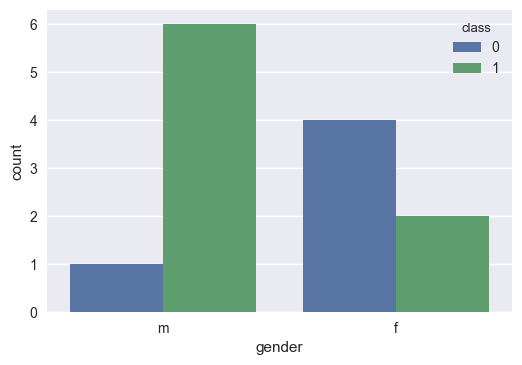

In [191]:
sns.countplot(x="gender", hue="class", data=df)

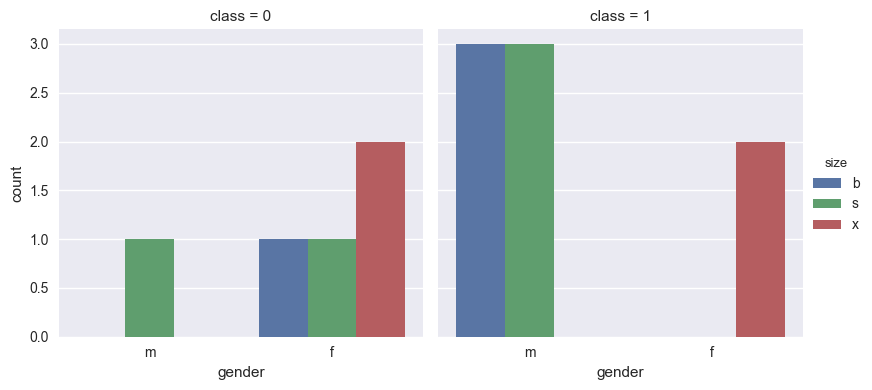

In [192]:
sns.factorplot(x = 'gender', hue = 'size', col='class', data=df, kind="count")

In [ ]:
# seaborn boxplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x="type", y="wage", data=dataReg)

sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set3")

In [ ]:
#Latitude and Longitude:

plt.figure(figsize=(12,12))
sns.jointplot(x=prop_df.latitude.values, y=prop_df.longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()


In [ ]:
## plot confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [ ]:
## confusion matrix for each threshold
lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))

j = 1
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:,1] > i
    
    plt.subplot(3,3,j)
    j += 1
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test_undersample,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

    # Plot non-normalized confusion matrix
    class_names = [0,1]
    plot_confusion_matrix(cnf_matrix
                          , classes=class_names
                          , title='Threshold >= %s'%i) 

In [ ]:
# ROC CURVE
lr = LogisticRegression(C = best_c, penalty = 'l1')
y_pred_undersample_score = lr.fit(X_train_undersample,y_train_undersample.values.ravel()).decision_function(X_test_undersample.values)

fpr, tpr, thresholds = roc_curve(y_test_undersample.values.ravel(),y_pred_undersample_score)
roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
## precision-recall curve at each threshold

from itertools import cycle

lr = LogisticRegression(C = 0.01, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

plt.figure(figsize=(5,5))

j = 1
for i,color in zip(thresholds,colors):
    y_test_predictions_prob = y_pred_undersample_proba[:,1] > i
    
    precision, recall, thresholds = precision_recall_curve(y_test_undersample,y_test_predictions_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, color=color,
                 label='Threshold: %s'%i)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")

In [193]:
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import pandas as pd
import calmap

all_days = pd.date_range('1/15/2014', periods=700, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)

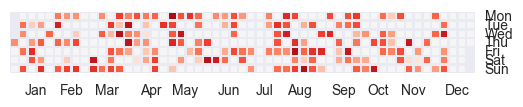

In [196]:
calmap.yearplot(events, year=2015)


(<matplotlib.figure.Figure at 0x127fe5090>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x128000650>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x127474a10>], dtype=object))

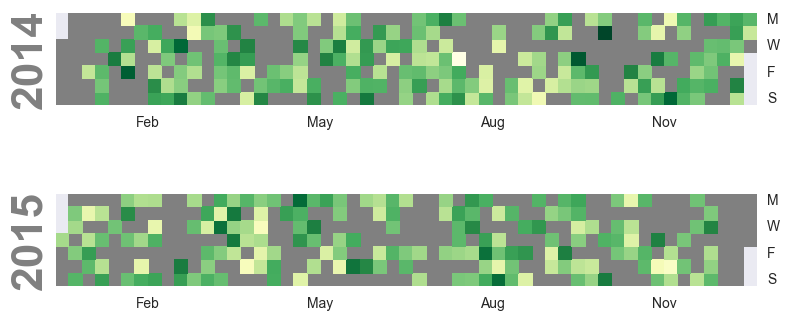

In [197]:
calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS',
                    dayticks=[0, 2, 4, 6], cmap='YlGn',
                    fillcolor='grey', linewidth=0,
                    fig_kws=dict(figsize=(8, 4)))

In [ ]:
## add new features
def add_refer_column(row):
    if row['num_of_referrals'] > 0:
        return 1
    else:
        return 0
    
mydata['has_referred'] = mydata.apply(lambda row: add_refer_column(row), axis=1)

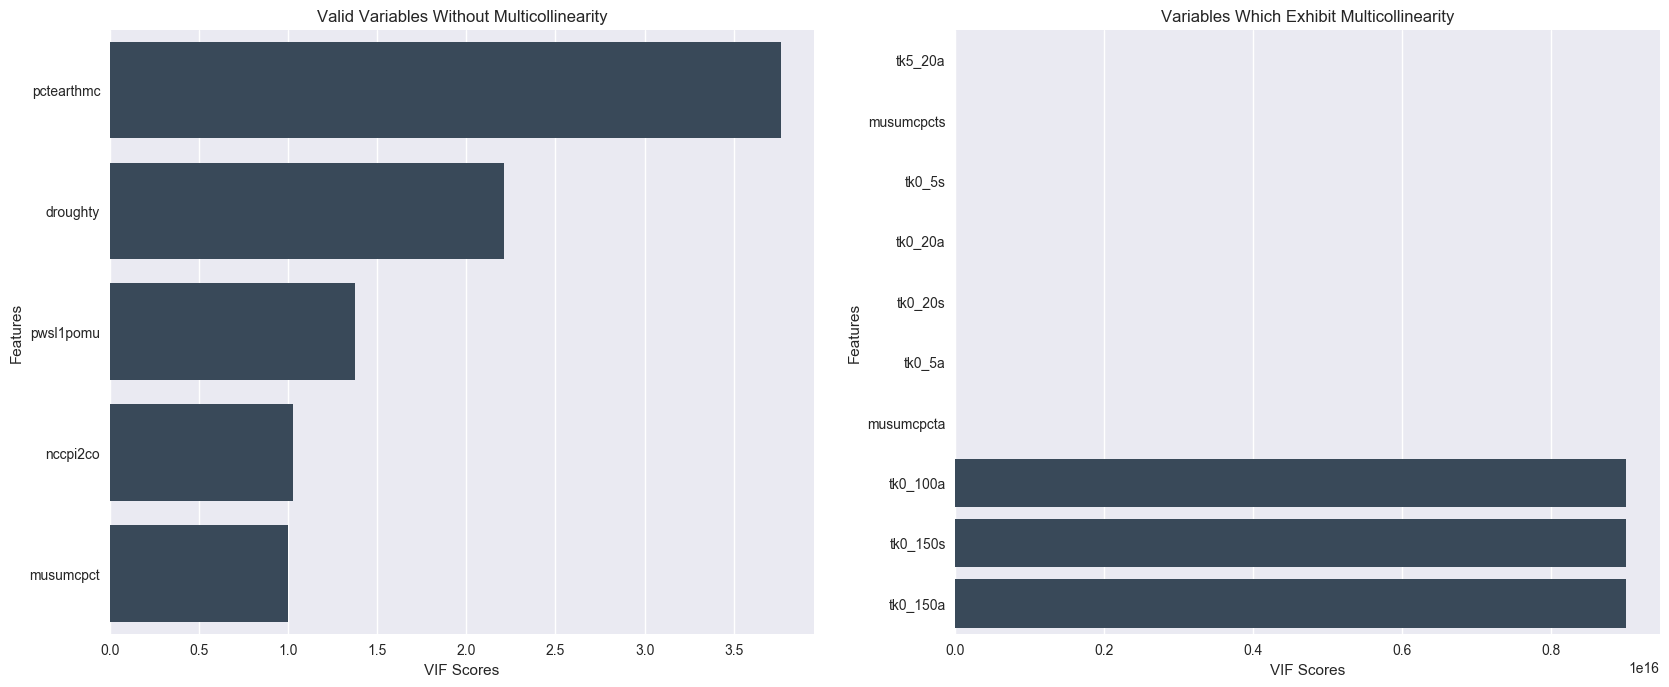

In [267]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  

def calculate_vif_(X):
    variables = list(X.columns)
    vif = {variable:variance_inflation_factor(exog=X.values, exog_idx=ix) for ix,variable in enumerate(list(X.columns))}
    return vif


numericalCol = []
for f in X_train_rs.columns:
    #print (f)
    if X_train_rs[f].dtype!='object':
        numericalCol.append(f)
dataFilterd = X_train_rs[numericalCol].fillna(-999)
vifDict = calculate_vif_(dataFilterd)

vifDf = pd.DataFrame()
vifDf['variables'] = vifDict.keys()
vifDf['vifScore'] = vifDict.values()
vifDf.sort_values(by=['vifScore'],ascending=False,inplace=True)
validVariables = vifDf[vifDf["vifScore"]<=5]
variablesWithMC  = vifDf[vifDf["vifScore"]>5]

fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20,8)
sns.barplot(data=validVariables,x="vifScore",y="variables",ax=ax1,orient="h",color="#34495e")
sns.barplot(data=variablesWithMC.head(10),x="vifScore",y="variables",ax=ax2,orient="h",color="#34495e")
ax1.set(xlabel='VIF Scores', ylabel='Features',title="Valid Variables Without Multicollinearity")
ax2.set(xlabel='VIF Scores', ylabel='Features',title="Variables Which Exhibit Multicollinearity")

In [274]:
## fill outliers
down_quantiles = X_train.quantile(0.05)
up_quantiles = X_train.quantile(0.95)
outliers_low = (X_train < down_quantiles)
outliers_high = (X_train > up_quantiles)
#X_train.mask(outliers_low, down_quantiles, axis=1)  
#X_train.mask(outliers_high, up_quantiles, axis=1)  